In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
test = pd.read_csv('titanic_test.csv')

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


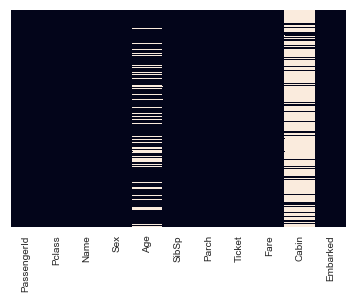

In [4]:
sns.heatmap(test.isnull(), yticklabels= False, cbar= False, Cmap='viridis' )

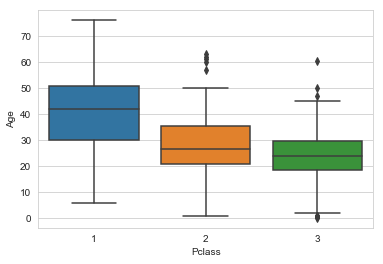

In [5]:
sns.boxplot(data=test, y='Age', x='Pclass' )

In [6]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 26
        else:
            return 23
    else:
        return Age

In [7]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age,axis=1)

In [8]:
test.drop('Cabin', axis=1, inplace=True)

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [10]:
Pclass = pd.get_dummies(test['Pclass'], drop_first=True)

In [11]:
sex = pd.get_dummies(test['Sex'], drop_first=True)

In [12]:
embarked = pd.get_dummies(test['Embarked'], drop_first=True)

In [13]:
test = pd.concat([test,Pclass,sex,embarked], axis=1)

In [14]:
test.drop(['Pclass', 'Sex', 'Embarked','Name', 'PassengerId'], axis=1, inplace=True)

In [15]:
test.head(2)

,Age,SibSp,Parch,Ticket,Fare,2,3,male,Q,S
0,34.5,0,0,330911,7.8292,0,1,1,1,0
1,47.0,1,0,363272,7.0000,0,1,0,0,1


In [18]:
test.to_csv('clean_test.csv', index=False)

In [19]:
pd.read_csv('clean_test.csv')

,Age,SibSp,Parch,Ticket,Fare,2,3,male,Q,S
0,34.5,0,0,330911,7.8292,0,1,1,1,0
1,47.0,1,0,363272,7.0000,0,1,0,0,1
2,62.0,0,0,240276,9.6875,1,0,1,1,0
3,27.0,0,0,315154,8.6625,0,1,1,0,1
4,22.0,1,1,3101298,12.2875,0,1,0,0,1
5,14.0,0,0,7538,9.2250,0,1,1,0,1
6,30.0,0,0,330972,7.6292,0,1,0,1,0
7,26.0,1,1,248738,29.0000,1,0,1,0,1
8,18.0,0,0,2657,7.2292,0,1,0,0,0
9,21.0,2,0,A/4 48871,24.1500,0,1,1,0,1
